In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d chinoysen/face-recognition-data 

face-recognition-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/face-recognition-data.zip')
zip_file.extractall()

In [ ]:

train_folder = '/content/Image_Train-20220909T071110Z-001/Image_Train'
test_folder = '/content/Image_Test-20220909T071021Z-001/Image_Test'


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./225)

In [ ]:
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size=(64, 64),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 224 images belonging to 16 classes.


In [ ]:
validation_set = test_datagen.flow_from_directory(test_folder,
                                                  target_size=(64, 64),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 96 images belonging to 16 classes.


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(16, activation='softmax')
])

In [ ]:
# Set training parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(training_set, epochs=25, validation_data = validation_set, verbose = 1, validation_steps=3)

Epoch 1/25
12/12 [==============================] - 26s 2s/step - loss: 2.0077 - accuracy: 0.3080 - val_loss: 2.2103 - val_accuracy: 0.3333
Epoch 2/25
12/12 [==============================] - 24s 2s/step - loss: 1.9095 - accuracy: 0.3616 - val_loss: 2.5440 - val_accuracy: 0.3333
Epoch 3/25
12/12 [==============================] - 23s 2s/step - loss: 1.9002 - accuracy: 0.3750 - val_loss: 2.6438 - val_accuracy: 0.3333
Epoch 4/25
12/12 [==============================] - 25s 2s/step - loss: 1.8693 - accuracy: 0.3929 - val_loss: 2.2712 - val_accuracy: 0.4000
Epoch 5/25
12/12 [==============================] - 27s 2s/step - loss: 1.8336 - accuracy: 0.3973 - val_loss: 2.2106 - val_accuracy: 0.3000
Epoch 6/25
12/12 [==============================] - 24s 2s/step - loss: 1.9166 - accuracy: 0.3527 - val_loss: 2.2473 - val_accuracy: 0.3000
Epoch 7/25
12/12 [==============================] - 23s 2s/step - loss: 1.8587 - accuracy: 0.4018 - val_loss: 2.0464 - val_accuracy: 0.3500
Epoch 8/25
12/12 [==

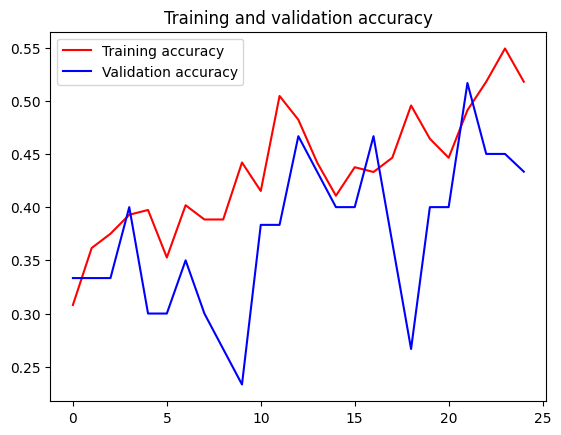

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()